<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/MNIST_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Nov 18 12:12:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
# Check if GPU is available and use it if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [4]:
# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std deviation of MNIST
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 100)  # First hidden layer with 100 nodes
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 50)  # Second hidden layer with 50 nodes
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(50, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.output(x)
        return x

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 504kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.55MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.7MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# Instantiate and move the model to the appropriate device
model = MLP().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

Epoch [1/10], Loss: 0.7829
Epoch [2/10], Loss: 0.2884
Epoch [3/10], Loss: 0.2286
Epoch [4/10], Loss: 0.1871
Epoch [5/10], Loss: 0.1581
Epoch [6/10], Loss: 0.1366
Epoch [7/10], Loss: 0.1193
Epoch [8/10], Loss: 0.1057
Epoch [9/10], Loss: 0.0960
Epoch [10/10], Loss: 0.0858


In [7]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 97.01%


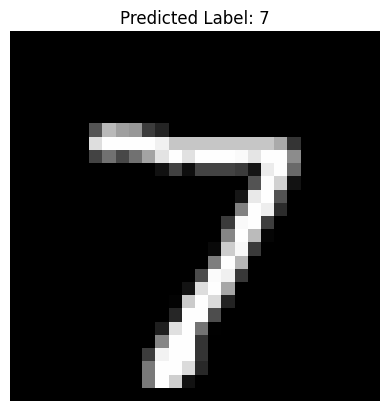

In [9]:
# Get an iterator for the test_loader
examples = iter(test_loader)

# Get the next batch of data and labels
example_data, example_labels = next(examples)

# Perform prediction
with torch.no_grad():
    output = model(example_data.to(device))
    _, pred_label = torch.max(output, 1)

# Visualize the first image and its predicted label
import matplotlib.pyplot as plt
plt.imshow(example_data[0].squeeze().cpu(), cmap='gray')  # Use .cpu() if needed
plt.title(f'Predicted Label: {pred_label[0].item()}')
plt.axis('off')  # Hide axes for better visualization
plt.show()

#update and save model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import joblib

# Check if GPU is available and use it if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std deviation of MNIST
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 100)  # First hidden layer with 100 nodes
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 50)  # Second hidden layer with 50 nodes
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(50, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.output(x)
        return x

# Instantiate and move the model to the appropriate device
model = MLP().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

# Save the trained model to a joblib file
torch.save(model.state_dict(), 'mnist_mlp.pth')
joblib.dump(model, 'mnist_mlp.joblib')

print("Model has been saved as 'mnist_mlp.pth' and 'mnist_mlp.joblib'.")


Using device: cuda
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.57MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.84MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.8029
Epoch [2/10], Loss: 0.2776
Epoch [3/10], Loss: 0.2202
Epoch [4/10], Loss: 0.1804
Epoch [5/10], Loss: 0.1531
Epoch [6/10], Loss: 0.1320
Epoch [7/10], Loss: 0.1168
Epoch [8/10], Loss: 0.1021
Epoch [9/10], Loss: 0.0925
Epoch [10/10], Loss: 0.0826
Model has been saved as 'mnist_mlp.pth' and 'mnist_mlp.joblib'.


In [ ]:
import torch
import joblib
from PIL import Image
import torchvision.transforms as transforms

# Load the saved model
model = MLP()
model.load_state_dict(torch.load('mnist_mlp.pth'))
model.to(device)  # Move model to the appropriate device
model.eval()

# Function to predict handwritten digit from an external image path
def predict_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(),  # Ensure the image is grayscale
        transforms.Resize((28, 28)),  # Resize image to 28x28
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std dev of MNIST
    ])

    # Load and preprocess the image
    image = Image.open(image_path).convert('L')  # Convert image to grayscale if not already
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Move image tensor to the same device as the model
    image_tensor = image_tensor.to(device)

    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)
        return predicted.item()

# Example usage
image_path = '/content/SEVEN.jpg'  # Replace with your image path
predicted_class = predict_image(image_path)
print(f'Predicted class for the input image is: {predicted_class}')


Predicted class for the input image is: 1


<ipython-input-5-281f36bd95e0>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('mnist_mlp.pth'))
